In [1]:
import pandas as pd

# Importar los archivos CSV limpios
df_SaberPro = pd.read_csv("SaberPro_limpio.csv")
df_Saber11 = pd.read_csv("Saber11_limpio.csv")

# Verificar las primeras filas de cada DataFrame para confirmar la carga correcta
print("Primeras filas de SaberPro:")
print(df_SaberPro.head())

print("\nPrimeras filas de Saber11:")
print(df_Saber11.head())


Primeras filas de SaberPro:
   ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO ESTU_CODDANE_COLE_TERMINO  \
0                   11.0                11001.0               NO DEFINIDO   
1                   76.0                76736.0               NO DEFINIDO   
2                   73.0                73001.0            173001004303.0   
3                   68.0                68081.0            168081000571.0   
4                   11.0                11001.0            111001001538.0   

   ESTU_COD_COLE_MCPIO_TERMINO  ESTU_COD_DEPTO_PRESENTACION  \
0                          0.0                         11.0   
1                          0.0                         76.0   
2                      73001.0                         73.0   
3                      68081.0                         68.0   
4                      11001.0                         11.0   

   INST_COD_INSTITUCION    INST_CARACTER_ACADEMICO  \
0                  2834  INSTITUCIÓN UNIVERSITARIA   
1                  120

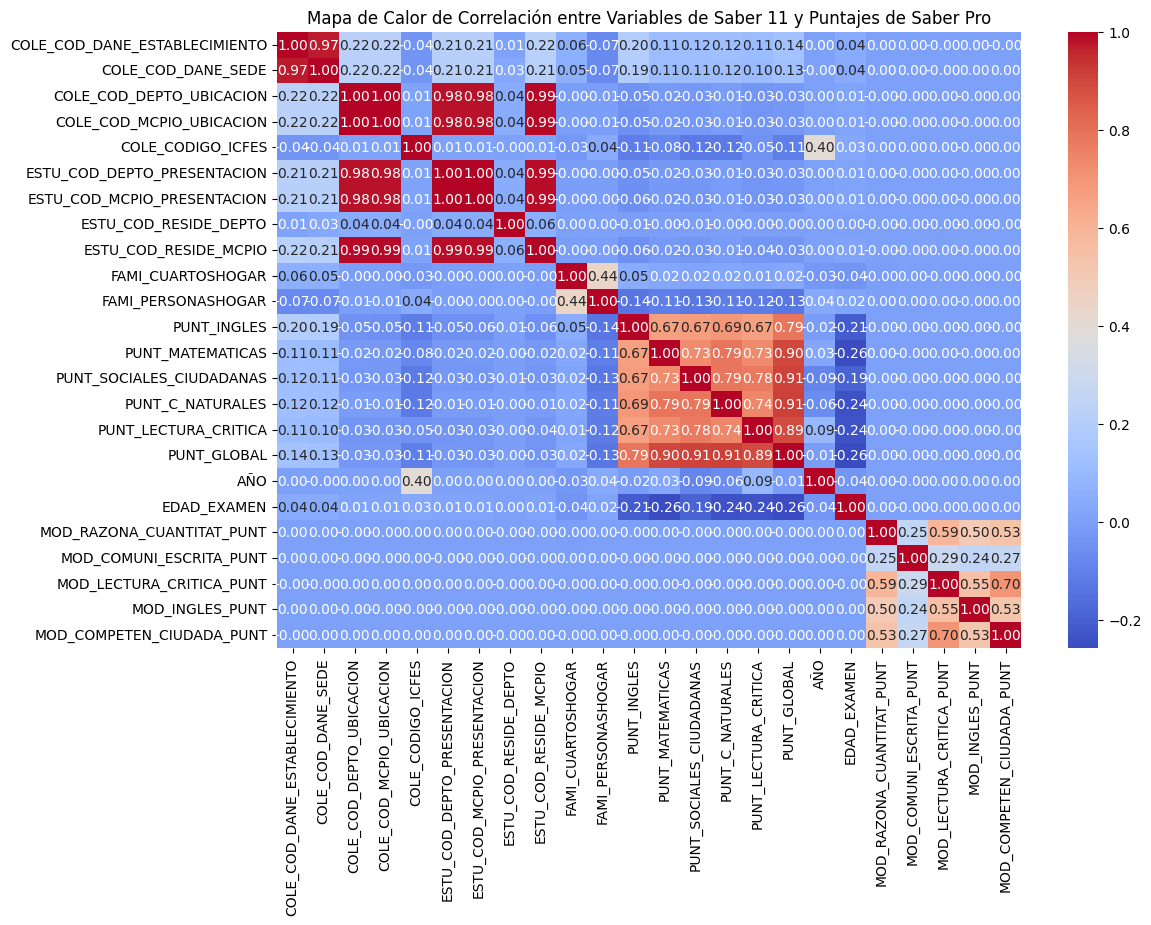

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables de puntaje de Saber Pro y las variables numéricas de Saber 11
puntajes_saberpro = df_SaberPro[['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT',
                                 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']]
numericas_saber11 = df_Saber11.select_dtypes(include=['float64', 'int64'])

# Concatenar las variables de Saber 11 y los puntajes de Saber Pro
datos_combinados = pd.concat([numericas_saber11, puntajes_saberpro], axis=1)

# Calcular la matriz de correlación
matriz_correlacion = datos_combinados.corr()

# Visualizar la matriz de correlación en un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de Calor de Correlación entre Variables de Saber 11 y Puntajes de Saber Pro")
plt.show()


# PCA

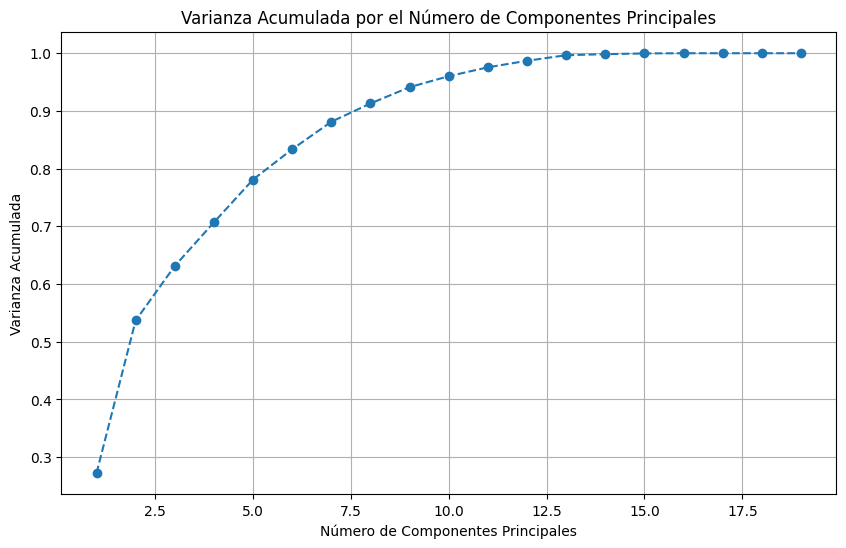

Varianza explicada por cada componente principal:
Componente 1: 0.2721
Componente 2: 0.2647
Componente 3: 0.0945
Componente 4: 0.0755
Componente 5: 0.0742
Componente 6: 0.0525
Componente 7: 0.0476
Componente 8: 0.0317
Componente 9: 0.0283
Componente 10: 0.0190
Componente 11: 0.0154
Componente 12: 0.0114
Componente 13: 0.0096
Componente 14: 0.0018
Componente 15: 0.0013
Componente 16: 0.0004
Componente 17: 0.0000
Componente 18: 0.0000
Componente 19: 0.0000


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo las variables numéricas de Saber 11
numericas_saber11 = df_Saber11.select_dtypes(include=['float64', 'int64'])

# Escalar las variables numéricas
scaler = StandardScaler()
numericas_saber11_scaled = scaler.fit_transform(numericas_saber11)

# Aplicar PCA
pca = PCA()
pca.fit(numericas_saber11_scaled)

# Explicar la varianza acumulada para cada componente principal
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por el Número de Componentes Principales')
plt.grid()
plt.show()

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i + 1}: {var:.4f}")



Los resultados muestran que los dos primeros componentes principales explican una gran parte de la variabilidad en los datos de Saber 11:

Componente 1: 27.21% de la varianza.
Componente 2: 26.47% de la varianza.
En conjunto, estos dos componentes capturan aproximadamente el 53.68% de la variabilidad total en los datos, lo cual es significativo. Si agregamos los primeros cinco componentes, cubriríamos alrededor del 78.1% de la varianza.